## Programming exercises

### 10.1 K-means clustering

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.cluster import KMeans

In [10]:
# Load Matlab data file and extract variables of interest

## Try four different dataset synth1.mat, synth2.mat, synth3.mat, synth4.mat
mat_data = loadmat('synth4.mat')
X = np.matrix(mat_data['X'])
y = np.matrix(mat_data['y'])
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

df=pd.DataFrame(X).set_axis(attributeNames,axis=1,inplace=False)
df["y"]=y
df.head()

,Attribute A,Attribute B,y
0,1.016632,0.791449,0
1,0.594381,0.065373,0
2,0.796319,1.323984,0
3,1.298868,1.276513,0
4,1.347284,1.568089,0


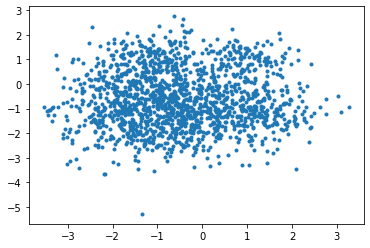

In [11]:
plt.plot(df["Attribute A"],df["Attribute B"],".");

In [12]:
# Number of clusters:
K = 4
km=KMeans(K)
km.fit(X)
km.fit_predict(X)
df['Cluster']=km.fit_predict(X)
df.head()

,Attribute A,Attribute B,y,Cluster
0,1.016632,0.791449,0,2
1,0.594381,0.065373,0,2
2,0.796319,1.323984,0,2
3,1.298868,1.276513,0,2
4,1.347284,1.568089,0,2


In [13]:
centroids=km.cluster_centers_
print(centroids)

[[ 0.86896231 -1.27006068]
 [-1.37173931  0.47108161]
 [ 0.62957628  0.75485905]
 [-1.36131728 -1.52116083]]


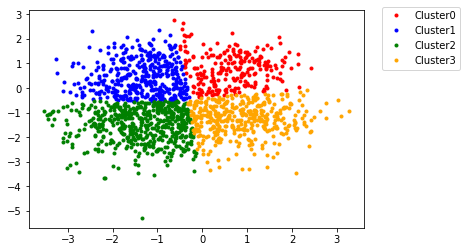

In [14]:
colors=["r","b","g","orange"]
clusters=df["Cluster"].unique().tolist()
labels=["Cluster"+str(i) for i in range(len(clusters))]
for cluster in clusters:
    cl_df=df[df["Cluster"]==cluster]
    plt.plot(cl_df["Attribute A"],cl_df["Attribute B"],".",
             color=colors[clusters.index(cluster)],
             label=labels[clusters.index(cluster)])
plt.legend(bbox_to_anchor=(1.04,1.04), loc="upper left");

#### Silhouette score

Counter({1: 953, 0: 647})
0.3469932976074135 clusters:2
------
Counter({2: 623, 0: 524, 1: 453})
0.36929224642616565 clusters:3
------
Counter({1: 532, 2: 418, 3: 412, 0: 238})
0.35167293748586187 clusters:4
------
Counter({4: 426, 3: 368, 0: 328, 2: 259, 1: 219})
0.3555548249969695 clusters:5
------
Counter({1: 334, 4: 292, 2: 270, 0: 268, 5: 251, 3: 185})
0.3685317039861155 clusters:6
------
Counter({5: 290, 0: 243, 3: 238, 1: 228, 4: 224, 2: 206, 6: 171})
0.35642706168187643 clusters:7
------
Counter({6: 308, 1: 209, 7: 198, 5: 192, 0: 182, 2: 175, 4: 172, 3: 164})
0.3464405926632575 clusters:8
------
Counter({2: 234, 3: 209, 6: 187, 4: 185, 0: 179, 1: 170, 7: 157, 8: 143, 5: 136})
0.3421440047984276 clusters:9
------


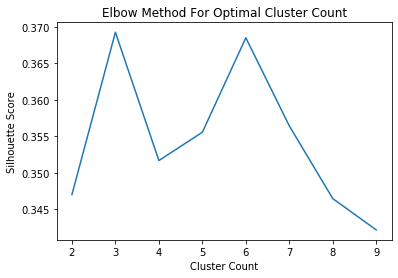

In [15]:
#################################
### PERFORM KMeans CLUSTERING ###
#################################
from collections import Counter
from sklearn.metrics import silhouette_samples, silhouette_score

Sum_of_squared_distances = []
scores = []
cluster_count = []
K= range(2,10,1)
for i in K:
    km = KMeans(n_clusters=i)
    km.fit(X)
    pred =km.predict(X)
    Sum_of_squared_distances.append(km.inertia_)
    scores.append(silhouette_score(X, pred))
    cluster_count.append(i)
    print(Counter(pred))
    print(str(silhouette_score(X, pred)) + ' clusters:' +str(i))
    print('------')
########################################
### Elbow plot with silhouette score ###
########################################
plt.plot(cluster_count,scores)
plt.xlabel('Cluster Count')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method For Optimal Cluster Count')
plt.show()

#### Supervised measures of cluster validity

In [25]:
import sklearn.metrics.cluster as cluster_metrics
def clusterval(y, clusterid):
    '''
    CLUSTERVAL Estimate cluster validity using Entropy, Purity, Rand Statistic,
    and Jaccard coefficient.
    
    Usage:
      Entropy, Purity, Rand, Jaccard = clusterval(y, clusterid);
    
    Input:
       y         N-by-1 vector of class labels 
       clusterid N-by-1 vector of cluster indices
    
    Output:
      Entropy    Entropy measure.
      Purity     Purity measure.
      Rand       Rand index.
      Jaccard    Jaccard coefficient.
    '''
    NMI = cluster_metrics.supervised.normalized_mutual_info_score(y.A.ravel(),clusterid,average_method="arithmetic")
    
    y = np.asarray(y).ravel(); clusterid = np.asarray(clusterid).ravel()
    C = np.unique(y).size; K = np.unique(clusterid).size; N = y.shape[0]
    EPS = 2.22e-16
    
    p_ij = np.zeros((K,C))          # probability that member of i'th cluster belongs to j'th class
    m_i = np.zeros((K,1))           # total number of objects in i'th cluster
    for k in range(K):
        m_i[k] = (clusterid==k).sum()
        yk = y[clusterid==k]
        for c in range(C):
            m_ij = (yk==c).sum()    # number of objects of j'th class in i'th cluster
            p_ij[k,c] = m_ij.astype(float)/m_i[k]
    entropy = ( (1-(p_ij*np.log2(p_ij+EPS)).sum(axis=1))*m_i.T ).sum() / (N*K) 
    purity = ( p_ij.max(axis=1) ).sum() / K

    f00=0; f01=0; f10=0; f11=0
    for i in range(N):
        for j in range(i):
            if y[i]!=y[j] and clusterid[i]!=clusterid[j]: f00 += 1;     # different class, different cluster    
            elif y[i]==y[j] and clusterid[i]==clusterid[j]: f11 += 1;   # same class, same cluster
            elif y[i]==y[j] and clusterid[i]!=clusterid[j]: f10 += 1;   # same class, different cluster    
            else: f01 +=1;                                              # different class, same cluster
    rand = np.float(f00+f11)/(f00+f01+f10+f11)
    jaccard = np.float(f11)/(f01+f10+f11)

    return rand, jaccard, NMI

In [26]:
# Load Matlab data file and extract variables of interest
mat_data = loadmat('synth1.mat')
X = np.matrix(mat_data['X'])
y = np.matrix(mat_data['y'])
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

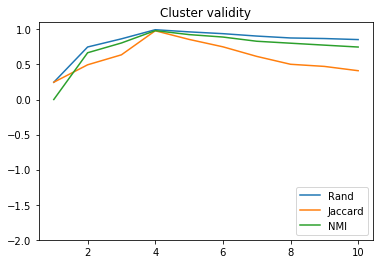

In [27]:
# Maximum number of clusters:
K = 10

# Allocate variables:
Rand = np.zeros((K,1))
Jaccard = np.zeros((K,1))
NMI = np.zeros((K,1))

for k in range(K):
    # run K-means clustering:
    #cls = Pycluster.kcluster(X,k+1)[0]
    km=KMeans(k+1)
    km.fit(X)
    centroids=km.cluster_centers_
    cls=km.predict(X)
    inertia=km.inertia_
    Rand[k], Jaccard[k], NMI[k] = clusterval(y,cls)
    
    
# Plot results:
plt.figure(1)
plt.title('Cluster validity')
plt.plot(np.arange(K)+1, Rand)
plt.plot(np.arange(K)+1, Jaccard)
plt.plot(np.arange(K)+1, NMI)
plt.ylim(-2,1.1)
plt.legend(['Rand', 'Jaccard', 'NMI'], loc=4);

K-means clustering has many different applications, one of which is data compression. A data set can be compressed by performing k-means clustering and then representing each data object by its cluster center. Thus, the only data that need to be stored is the K cluster centers and the N cluster indices.

#### Wildfaces dataset

In [28]:
# Load Matlab data file and extract variables of interest
mat_data = loadmat('wildfaces.mat')
X = np.matrix(mat_data['X'])
N, M = X.shape
# Image resolution and number of colors
x = 40 
y = 40
c = 3

In [29]:
print(X.shape)
print(X[0,0:1600])
print(X[0,1600:2*1600])
print(X[0,2*1600:3*1600])

(1000, 4800)
[[0.05962987 0.06709889 0.06586909 ... 0.1270861  0.12015193 0.11739649]]
[[0.10839297 0.10699186 0.10361883 ... 0.1364158  0.13218694 0.12911524]]
[[0.0088952  0.01274275 0.00986216 ... 0.17456022 0.16702263 0.16427149]]


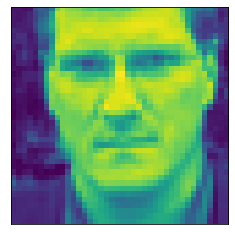

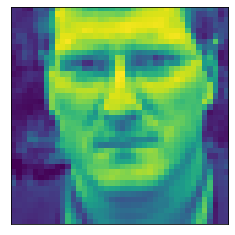

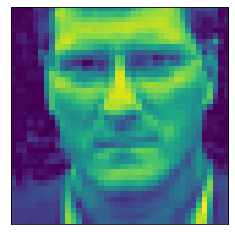

In [30]:
## Plot two dimentional array
plt.figure(1)
plt.imshow(X[0,0:1600].reshape(40,40).T,interpolation='None')
plt.xticks([]); plt.yticks([])
plt.figure(2)
plt.imshow(X[0,1600:2*1600].reshape(40,40).T,interpolation='None')
plt.xticks([]);plt.yticks([])
plt.figure(3)
plt.imshow(X[0,2*1600:3*1600].reshape(40,40).T,interpolation='None')
plt.xticks([]); plt.yticks([]);

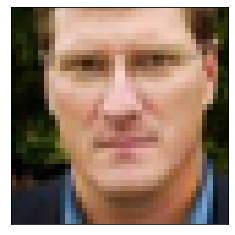

In [31]:
## Plot three dimentional array
## Important: reshape is used for array while resize is used for matrix
## plt.imshow(np.array(X[0,:]).flatten().reshape((3,40,40)).T,interpolation='None')
plt.imshow(np.resize(X[0,:],(3,40,40)).T,interpolation='None')
plt.xticks([]); plt.yticks([]);

In [32]:
# number of clusters
K=13
km=KMeans(K)
km.fit(X)
centroids=km.cluster_centers_
cls=km.predict(X)
inertia=km.inertia_

(3.0, 5.0)


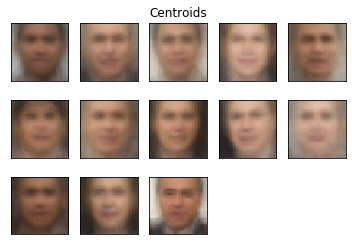

In [33]:
# Plot centroids
n1 = np.ceil(np.sqrt(K/2)); n2 = np.ceil(np.float(K)/n1);
print((n1,n2))
for k in range(K):
    plt.subplot(n1,n2,k+1)
    plt.imshow(np.reshape(centroids[k,:],(c,x,y)).T,interpolation='None',cmap="binary")
    plt.xticks([]); plt.yticks([])
    if k==np.floor((n2-1)/2): plt.title('Centroids')

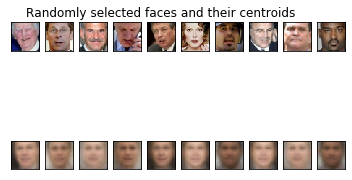

In [34]:
# Plot few randomly selected faces and their nearest centroids    
L = 10      # number of images to plot
j = np.random.randint(0, N, L)

for l in range(L):
    plt.subplot(2,L,l+1)
    plt.imshow(np.resize(X[j[l],:],(c,x,y)).T,interpolation='None',cmap="binary")
    plt.xticks([]); plt.yticks([])
    if l==np.floor((L-1)/2): plt.title('Randomly selected faces and their centroids')
    plt.subplot(2,L,L+l+1)
    plt.imshow(np.resize(centroids[cls[j[l]],:],(c,x,y)).T,interpolation='None',cmap="binary")
    plt.xticks([]); plt.yticks([]);



In [35]:
#################################
### PERFORM KMeans CLUSTERING ###
#################################
from collections import Counter
from sklearn.metrics import silhouette_samples, silhouette_score

Sum_of_squared_distances = []
scores = []
cluster_count = []
K= range(8,25,1)
for i in K:
    km = KMeans(n_clusters=i)
    km.fit(X)
    pred =km.predict(X)
    Sum_of_squared_distances.append(km.inertia_)
    scores.append(silhouette_score(X, pred))
    cluster_count.append(i)
    print(Counter(pred))
    print(str(silhouette_score(X, pred)) + ' clusters:' +str(i))
    print('------')

Counter({3: 180, 6: 164, 1: 143, 0: 130, 5: 114, 2: 97, 7: 91, 4: 81})
0.048442361513416105 clusters:8
------
Counter({8: 152, 6: 141, 2: 122, 5: 121, 7: 105, 0: 101, 1: 96, 4: 81, 3: 81})
0.04426046161515279 clusters:9
------
Counter({5: 152, 3: 127, 6: 113, 9: 97, 2: 93, 0: 92, 7: 90, 1: 86, 4: 75, 8: 75})
0.04432756281626207 clusters:10
------
Counter({2: 122, 7: 107, 9: 106, 6: 101, 10: 89, 4: 86, 3: 86, 5: 83, 8: 82, 0: 72, 1: 66})
0.039981193629406366 clusters:11
------
Counter({2: 130, 3: 109, 10: 102, 1: 98, 11: 96, 8: 83, 4: 83, 0: 70, 9: 67, 6: 63, 5: 53, 7: 46})
0.04047222350619277 clusters:12
------
Counter({11: 113, 5: 107, 8: 91, 6: 85, 2: 82, 4: 75, 7: 74, 9: 73, 12: 65, 10: 64, 1: 61, 0: 58, 3: 52})
0.04046649928347651 clusters:13
------
Counter({2: 101, 12: 93, 4: 87, 10: 81, 11: 78, 5: 77, 1: 77, 13: 76, 6: 62, 0: 61, 8: 60, 3: 56, 7: 49, 9: 42})
0.03422522733968321 clusters:14
------
Counter({13: 100, 12: 99, 1: 96, 10: 90, 14: 71, 4: 68, 6: 68, 9: 66, 11: 59, 3: 57,

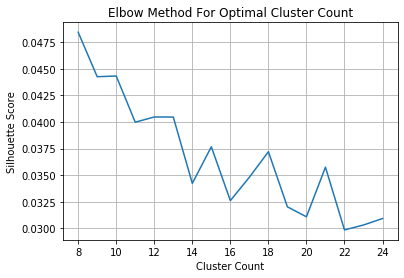

In [36]:
########################################
### Elbow plot with silhouette score ###
########################################
plt.plot(cluster_count,scores)
plt.grid()
plt.xlabel('Cluster Count')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method For Optimal Cluster Count')
plt.show()

#### Digits dataset 

In [38]:
# Load Matlab data file and extract variables of interest
mat_data = loadmat('digits.mat')
X = np.matrix(mat_data['X'])
N, M = X.shape
# Image resolution and number of colors

(9298, 256)


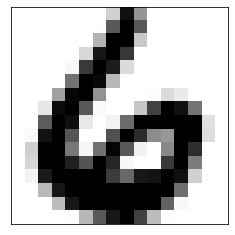

In [39]:
print(X.shape)
plt.imshow(X[0,:].reshape(16,16),cmap="binary")
plt.xticks([]);plt.yticks([]);

In [40]:
# number of clusters
K=10
km=KMeans(K)
km.fit(X)
centroids=km.cluster_centers_
cls=km.predict(X)
inertia=km.inertia_

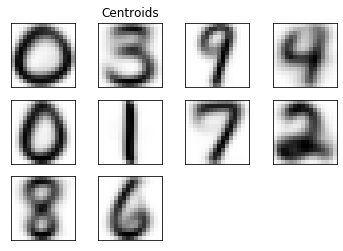

In [41]:
# Plot centroids
n1 = np.ceil(np.sqrt(K/2))
n2 = np.ceil(np.float(K)/n1)
for k in range(K):
    plt.subplot(n1,n2,k+1)
    plt.imshow(np.reshape(centroids[k,:],(16,16)),interpolation='None',cmap="binary")
    plt.xticks([]); plt.yticks([])
    if k==np.floor((n2-1)/2): plt.title('Centroids')


In [42]:
#################################
### PERFORM KMeans CLUSTERING ###
#################################
from collections import Counter
from sklearn.metrics import silhouette_samples, silhouette_score

Sum_of_squared_distances = []
scores = []
cluster_count = []
K= range(8,20,1)
for i in K:
    km = KMeans(n_clusters=i)
    km.fit(X)
    pred =km.predict(X)
    Sum_of_squared_distances.append(km.inertia_)
    scores.append(silhouette_score(X, pred))
    cluster_count.append(i)
    print(Counter(pred))
    print(str(silhouette_score(X, pred)) + ' clusters:' +str(i))
    print('------')

Counter({5: 1691, 2: 1430, 3: 1360, 7: 1211, 0: 1054, 6: 1011, 4: 781, 1: 760})
0.1222018271432696 clusters:8
------
Counter({3: 1520, 4: 1392, 0: 1171, 8: 1038, 7: 977, 6: 895, 5: 787, 2: 780, 1: 738})
0.1360716570890436 clusters:9
------
Counter({9: 1350, 6: 1154, 7: 1047, 8: 980, 4: 977, 2: 863, 5: 787, 0: 754, 1: 736, 3: 650})
0.1285504740033683 clusters:10
------
Counter({0: 1320, 4: 1149, 9: 997, 10: 937, 3: 859, 5: 776, 1: 725, 6: 699, 2: 647, 8: 618, 7: 571})
0.1322815549543748 clusters:11
------
Counter({0: 1315, 3: 1146, 10: 1006, 7: 854, 11: 823, 1: 652, 6: 646, 5: 644, 8: 616, 4: 576, 9: 569, 2: 451})
0.13143424534512432 clusters:12
------
Counter({4: 1316, 2: 1012, 7: 785, 10: 783, 9: 730, 11: 661, 6: 631, 5: 631, 3: 624, 0: 567, 12: 561, 8: 551, 1: 446})
0.13422491330254901 clusters:13
------
Counter({10: 1310, 7: 1016, 5: 790, 11: 722, 12: 691, 13: 642, 3: 634, 4: 620, 9: 567, 0: 561, 8: 473, 6: 470, 1: 401, 2: 401})
0.13233134695840834 clusters:14
------
Counter({1: 131

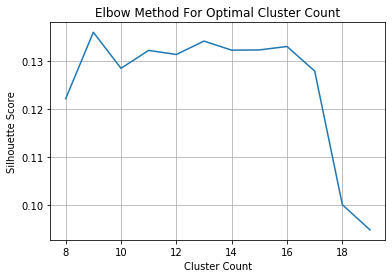

In [44]:
########################################
### Elbow plot with silhouette score ###
########################################
plt.plot(cluster_count,scores)
plt.grid()
plt.xlabel('Cluster Count')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method For Optimal Cluster Count')
plt.show()

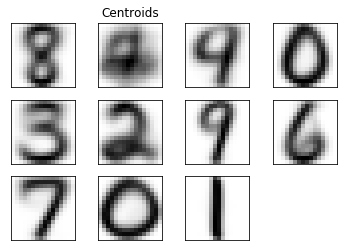

In [47]:
# number of clusters
K=11
km=KMeans(K)
km.fit(X)
centroids=km.cluster_centers_
cls=km.predict(X)
inertia=km.inertia_
# Plot centroids
n1 = np.ceil(np.sqrt(K/2))
n2 = np.ceil(np.float(K)/n1)
for k in range(K):
    plt.subplot(n1,n2,k+1)
    plt.imshow(np.reshape(centroids[k,:],(16,16)),interpolation='None',cmap="binary")
    plt.xticks([]); plt.yticks([])
    if k==np.floor((n2-1)/2): plt.title('Centroids')

### 10.2 Hierarchical clustering

We will in this part of the exercise consider hierarchical clustering based on the functions from the package `scipy.cluster.hierarchy`. Function `linkage()` forms a sample to sample distance matrix according to a given distance metric, and creates the linkages between data points forming the hierarchical cluster tree. Function
`dendrogram()` creates a plot of the generated tree.

In [48]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [49]:
# Load Matlab data file and extract variables of interest
mat_data = loadmat('synth1.mat')
X = np.matrix(mat_data['X'])
y = np.matrix(mat_data['y'])
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)
df=pd.DataFrame(X).set_axis(attributeNames, axis=1,inplace=False)
df["y"]=y
print(df.shape)
df.head()

(200, 3)


,Attribute A,Attribute B,y
0,0.418193,0.725060,0
1,1.160776,1.253722,0
2,0.991951,0.573326,0
3,1.059111,1.143922,0
4,0.866616,1.143537,0


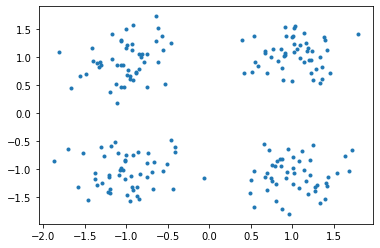

In [50]:
plt.plot(df["Attribute A"],df["Attribute B"],".");

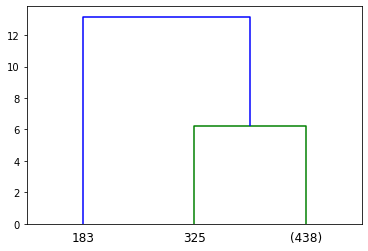

In [61]:
# Perform hierarchical/agglomerative clustering on data matrix
Method = 'single'
Metric = 'euclidean'

Z = linkage(X, method=Method, metric=Metric)

# Compute and display clusters by thresholding the dendrogram
Maxclust = 4
cls = fcluster(Z, criterion='maxclust', t=Maxclust)

# Display dendrogram
max_display_levels=1
plt.figure(2)
dendrogram(Z, truncate_mode='level', p=max_display_levels)

plt.show()

#### Wholesale Customer Segmentation problem using Hierarchical Clustering

The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

In [52]:
df=pd.read_csv("Wholesale customers data.csv")
print(df.isnull().sum())
df.head()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


For clustering, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table).

In [53]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,normalize
ColName=df.columns
scaler=StandardScaler()
X=scaler.fit_transform(df)
df_scaled=pd.DataFrame(X).set_axis(ColName,axis=1,inplace=False)

In [54]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

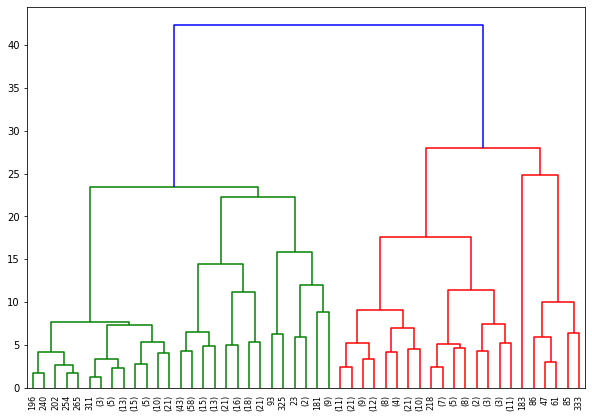

In [55]:
# Perform hierarchical/agglomerative clustering on data matrix
Method = 'ward'
Metric = 'euclidean'

Z = linkage(df_scaled, method=Method, metric=Metric)

# Display dendrogram
plt.figure(figsize=(10, 7))  
max_display_levels=5
dendrogram(Z, truncate_mode='level', p=max_display_levels)

plt.show()

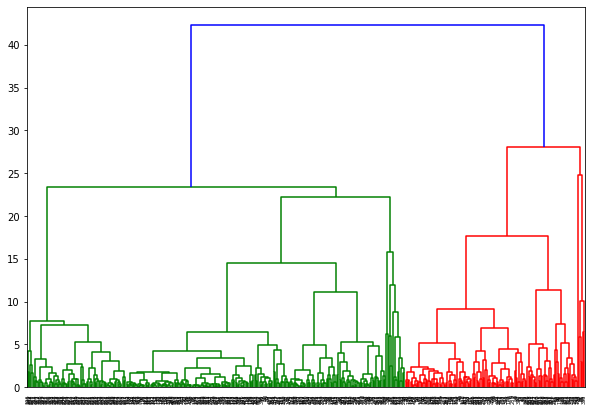

In [89]:
# Perform hierarchical/agglomerative clustering on data matrix
Method = 'ward'
Metric = 'euclidean'

Z = linkage(df_scaled, method=Method, metric=Metric)

# Display dendrogram
plt.figure(figsize=(10, 7))  
dendrogram(Z)

plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 30 and cut the dendrogram:

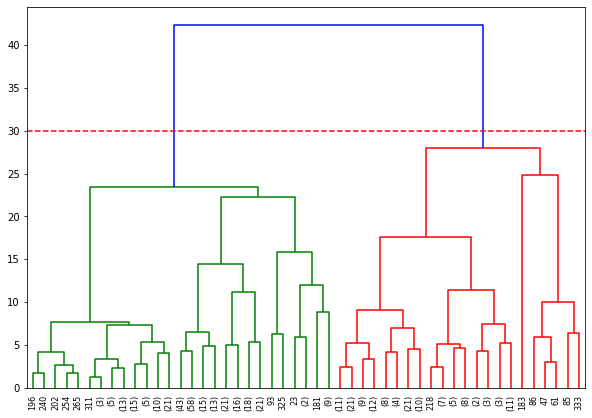

In [56]:
# Perform hierarchical/agglomerative clustering on data matrix
Method = 'ward'
Metric = 'euclidean'

Z = linkage(df_scaled, method=Method, metric=Metric)

# Display dendrogram
plt.figure(figsize=(10, 7))  
max_display_levels=5
dendrogram(Z, truncate_mode='level', p=max_display_levels)

plt.axhline(y=30, color='r', linestyle='--')

plt.show()

In [57]:
Maxclust=2
cls = fcluster(Z, criterion='maxclust', t=Maxclust)

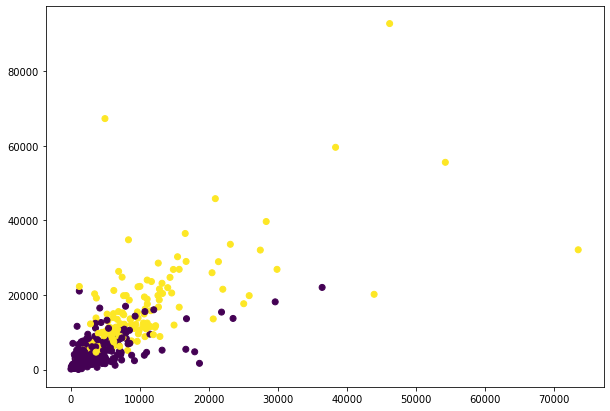

In [58]:
df["cluster"]=cls

plt.figure(figsize=(10, 7))  
plt.scatter(df['Milk'], df['Grocery'],c=df["cluster"]);